In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
titanic = pd.read_csv("Titanic_train.csv")

In [40]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [45]:
titanic["Age"].median()

28.0

In [46]:
titanic["Age"].mean()

29.69911764705882

In [47]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [48]:
titanic = titanic.drop(["PassengerId","Cabin","Ticket","Name"],axis = 1)

In [49]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [52]:
titanic["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [53]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

In [54]:

dummies = pd.get_dummies(titanic[['Sex', 'Embarked']], drop_first=True)

titanic = pd.concat([titanic.drop(['Sex', 'Embarked'], axis=1), dummies], axis=1)

In [55]:
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


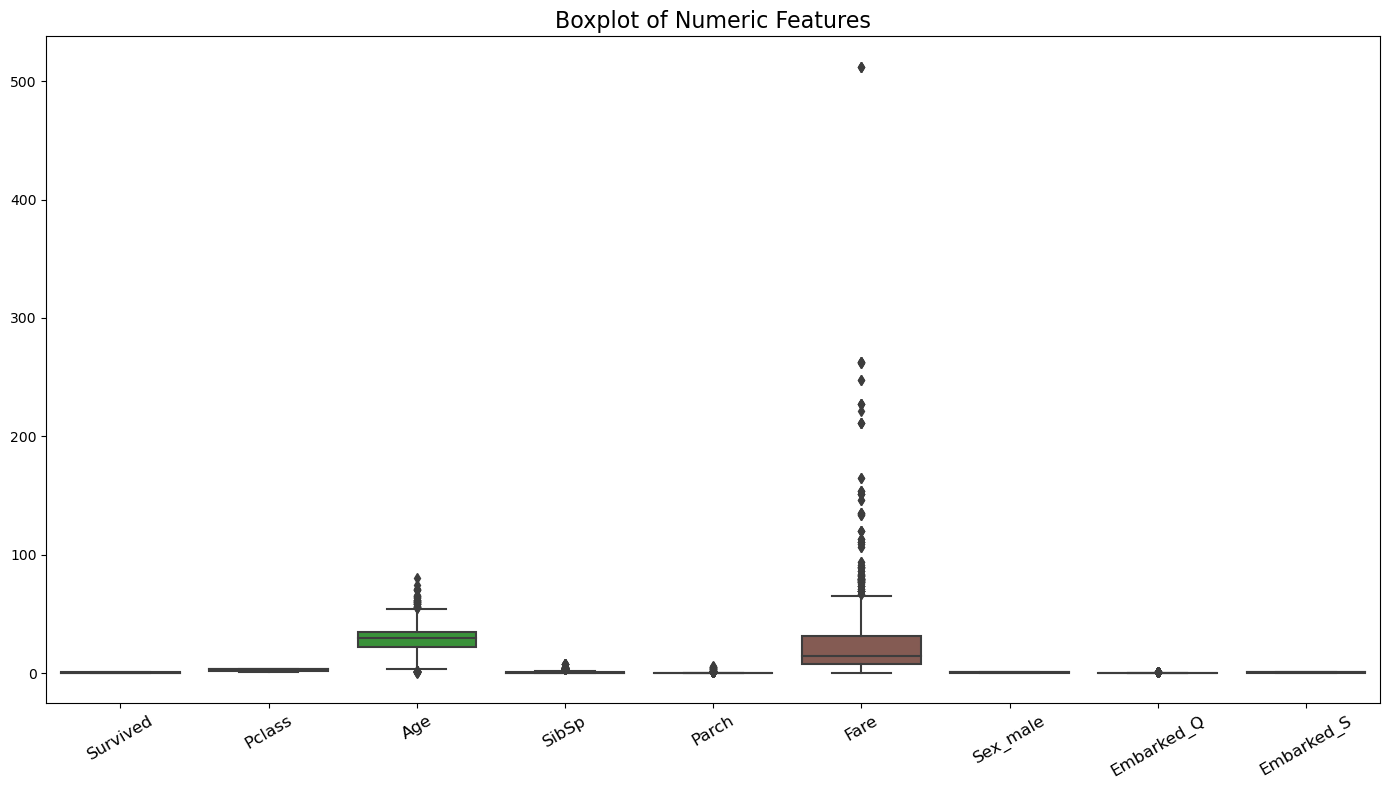

In [57]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=titanic.select_dtypes(include='number'))
plt.xticks(rotation=30, fontsize=12)
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [58]:
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers)

In [59]:
count_outliers_iqr(titanic,"Age")

66

In [60]:
count_outliers_iqr(titanic,"Fare")

116

In [61]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)

# Apply to Age and Fare
cap_outliers_iqr(titanic, 'Age')
cap_outliers_iqr(titanic, 'Fare')

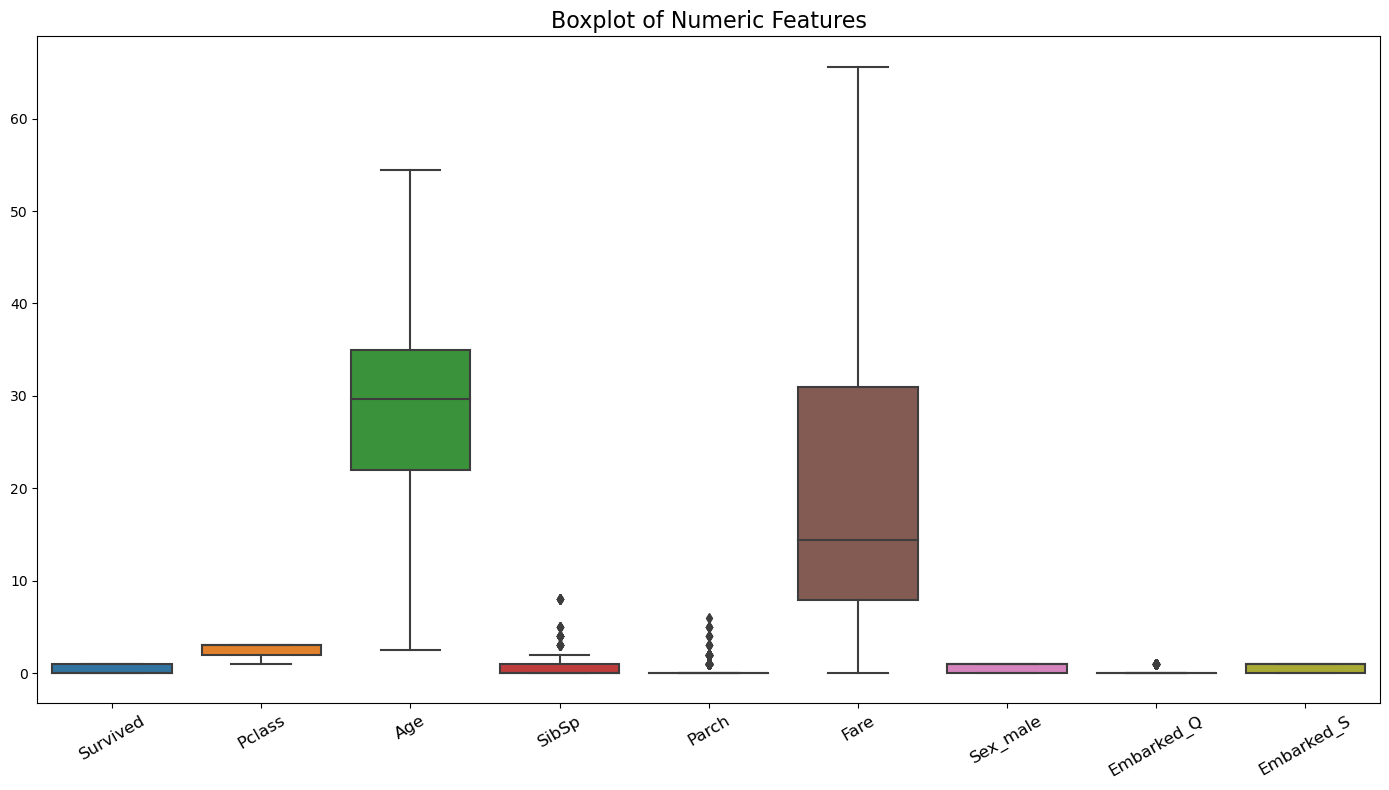

In [62]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=titanic.select_dtypes(include='number'))
plt.xticks(rotation=30, fontsize=12)
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

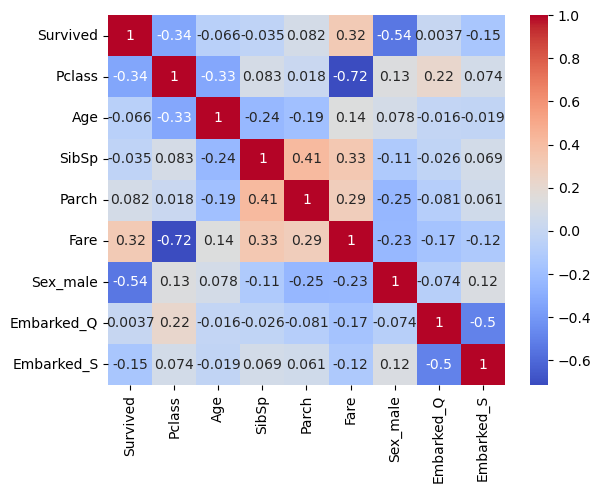

In [63]:
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.show()

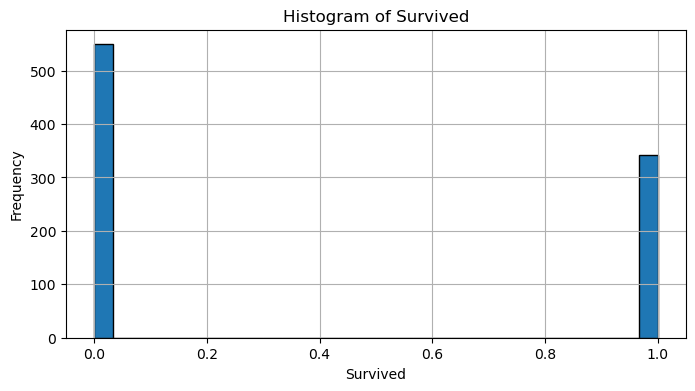

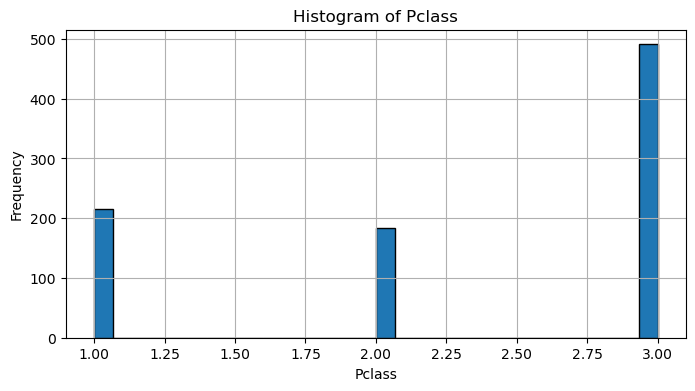

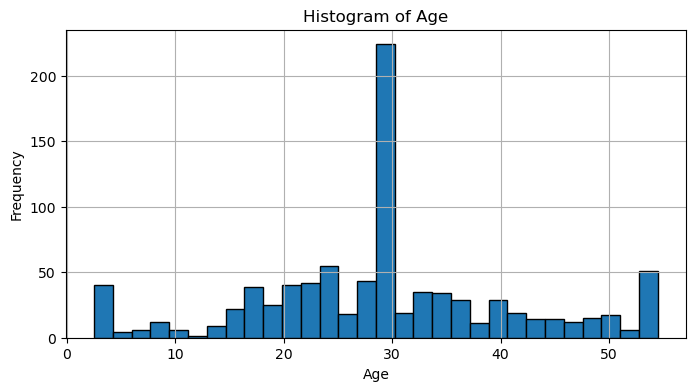

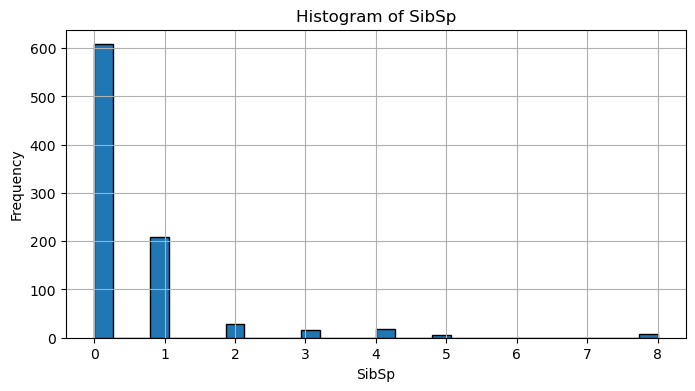

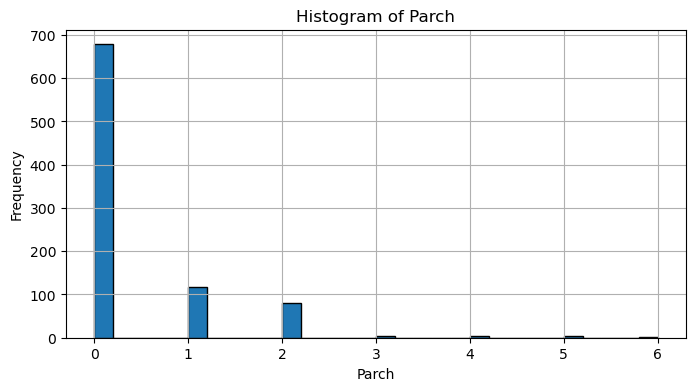

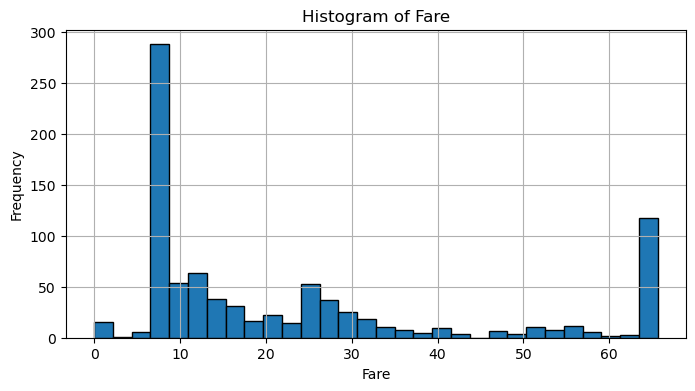

In [64]:
col = titanic.select_dtypes(include= ['float','int']).columns
col

for cols in col:
    plt.figure(figsize=(8, 4))
    plt.hist(titanic[cols], bins=30, edgecolor='black')
    plt.title(f'Histogram of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'], test_size=0.33,random_state=101)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
363,3,35.000000,0,0,7.0500,1,0,1
279,3,35.000000,1,1,20.2500,0,0,1
626,2,54.500000,0,0,12.3500,1,1,0
516,2,34.000000,0,0,10.5000,0,0,1
18,3,31.000000,1,0,18.0000,0,0,1
...,...,...,...,...,...,...,...,...
575,3,19.000000,0,0,14.5000,1,0,1
838,3,32.000000,0,0,56.4958,1,0,1
337,1,41.000000,0,0,65.6344,0,0,0
523,1,44.000000,0,1,57.9792,0,0,0


In [69]:
model.fit(X_train,y_train)

/Users/rajeshkaki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
predictions = model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       169
           1       0.80      0.68      0.74       126

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

Accuracy: 0.7898305084745763


ROC-AUC Score: 0.8705


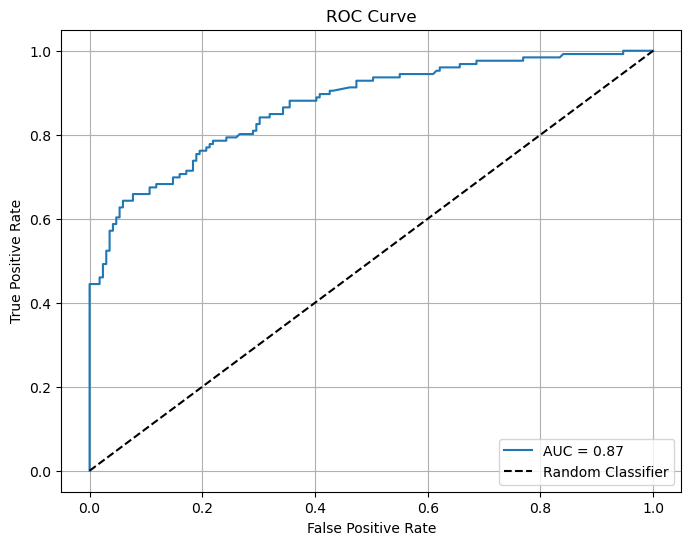

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities for class 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 3: Compute AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

5
(a)- The logistic regression model provides coefficients for each feature that reflect its impact on the likelihood of survival. A positive coefficient increases the odds of survival, while a negative coefficient decreases it. For example, being in a higher passenger class (Pclass), being male, or paying a lower fare might reduce the survival odds, whereas younger age or embarking from certain ports could improve them. The odds ratio (exponentiated coefficient) helps us understand the magnitude of these effects. Features with higher absolute coefficients and statistically significant p-values (typically < 0.05) are considered more influential in predicting survival. In this case, variables like Sex_male, Pclass, and Fare often stand out as critical predictors.

(b) - In short, Sex_male, Pclass, and Fare are the most significant predictors of survival. Being male and in a lower class reduces survival chances, while paying a higher fare increases them. Features with low p-values are statistically significant and strongly influence the model's predictions.


In [73]:
import pickle
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [74]:
import streamlit as st
import numpy as np
import pickle

# Load the trained model
try:
    model = pickle.load(open("logistic_model.pkl", "rb"))
except FileNotFoundError:
    st.error("Model file not found. Make sure 'logistic_model.pkl' is in the same folder.")
    st.stop()

# App title
st.title("🚢 Titanic Survival Prediction App")

# User inputs
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
age = st.slider("Age", 0, 80, 30)
fare = st.number_input("Fare", min_value=0.0, max_value=600.0, value=50.0)
sex = st.selectbox("Sex", ["male", "female"])
embarked_q = st.checkbox("Embarked at Queenstown (Q)")
embarked_s = st.checkbox("Embarked at Southampton (S)")

# Convert inputs
sex_male = 1 if sex == "male" else 0
input_features = np.array([[pclass, age, fare, sex_male, int(embarked_q), int(embarked_s)]])

# Predict
if st.button("Predict Survival"):
    prediction = model.predict(input_features)[0]
    probability = model.predict_proba(input_features)[0][1]

    result = "Survived 🟢" if prediction == 1 else "Did Not Survive 🔴"
    st.markdown(f"### Prediction: **{result}**")
    st.write(f"Survival Probability: **{probability:.2f}**")


1. What is the difference between precision and recall?

Precision and recall are ways to measure how well a classification model works. Precision tells us out of all the times the model predicted "yes", how many were actually correct (focuses on accuracy of positive predictions). Recall tells us out of all the actual "yes" cases, how many the model correctly found (focuses on finding all positives). So, precision cares about being right when it says "yes", while recall cares about catching all the true "yes" cases.


2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a method to check how well a model will work on new, unseen data. It does this by splitting the dataset into parts, training the model on some parts and testing it on others, and repeating this process several times. This is important in binary classification because it helps ensure the model is not just memorizing the data but can actually generalize well to make correct predictions on new data.